In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('job_offers.csv')
df

,CGPA,Communication,Aptitude,ProgrammingSkill,JobOffered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,1,1,1,1
9,1,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CGPA              20 non-null     int64
 1   Communication     20 non-null     int64
 2   Aptitude          20 non-null     int64
 3   ProgrammingSkill  20 non-null     int64
 4   JobOffered        20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


In [7]:
x = df.drop('JobOffered',axis = 1) #fetures
y = df['JobOffered'] #label

In [10]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [11]:
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
y_pred = dtree.predict(x)

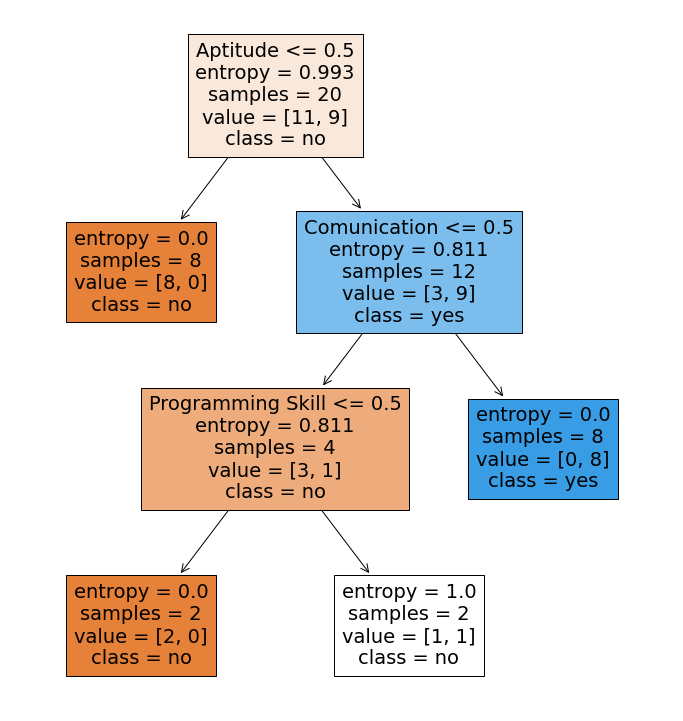

In [17]:
plt.figure(figsize=(12,13))
plot_tree(dtree, filled=True, feature_names=['CGPA' , 'Comunication' , 'Aptitude' , 'Programming Skill'], class_names=['no','yes']),
plt.show()

In [18]:
cm = confusion_matrix(y , y_pred)

In [21]:
TN,FP,FN,TP = cm.ravel()

In [23]:
accuracy = (TP + TN)/(TN + FP + FN + TP)
accuracy

0.95

In [24]:
accuracy_score(y,y_pred)

0.95

In [25]:
precision = TP / (TP + FP)
precision

1.0

In [28]:
precision_score(y,y_pred)

1.0

In [29]:
recall = TP / (TP + FN)
recall

0.8888888888888888

In [32]:
recall_score(y,y_pred)

0.8888888888888888

In [33]:
specificity = TN / (TN + FP)
specificity

1.0

In [34]:
f1score = 2 * (precision * recall) / (precision + recall)
f1score

0.9411764705882353

In [37]:
f1_score(y,y_pred)

0.9411764705882353

<AxesSubplot:>

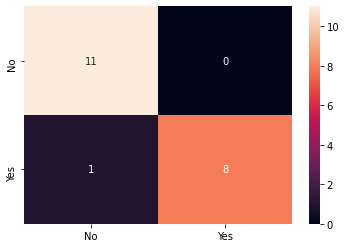

In [39]:
sns.heatmap(cm , annot=True , xticklabels=['No','Yes'] , yticklabels=['No','Yes'])

In [41]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [44]:
iris = load_iris()
x = iris.data
y = iris.target

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
kvalues = [3,5,7,9]
bestaccuracy = 0
bestk = 0
for k in kvalues:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > bestaccuracy:
        bestaccuracy = accuracy
        bestk = k
print("Best accuracy is " , bestaccuracy)
print("Best k is " , bestk)

Best accuracy is  1.0
Best k is  3
